In [11]:
# Read test files
from pyuvdata import UVData
from hera_commissioning_tools import plots, utils
import os
import numpy as np

# Getting data from the librarian

See the full instructions on the HERA wiki: http://hera.pbworks.com/w/page/118774905/Librarian%3A%20Help%20for%20Users

For this tutorial, start by executing the following command in a local terminal:

    ssh -L 21106:heralib:21106 <username>@ssh.aoc.nrao.edu
    
Now, point a local browser to http://localhost:21106/, and use the password "newmexico" to log in. Next, you can search for your desired files. A full guide for the many ways one can search the available files is here: https://github.com/HERA-Team/librarian/blob/main/docs/Searching.md
    
For this tutorial, navigate to the menu at the top of the page, and select search > files. To find the same files used in this tutorial, enter the following search string:
    
    { "name-matches": "zen.2459650.45%uvh5" }

The first string of numbers indicates the JD you are searching for, and the second set of numbers (in this case "45") are selecting a subset of files from that JD. We are doing this just to keep the number of files to a manageable size - if you want to stage a whole night of data, you would search this string: { "name-matches": "zen.<JD>%uvh5" }. By adding the "uvh5" at the end of our search string we are searching only for data files - remove this part of the string to see all available data files (this includes RFI and data quality flagging info, calibration info, etc).
    
Now, scroll to the bottom of the page. Enter your username where prompted, and in the Job Name field, enter a directory name, or path to a directory, where you want the staged data to go. As you type, you should see the "destination directory" field update - make sure this shows the desired destination. When ready, click "launch" to stage your files. You should start to see files appear in your directory once your browser shows a confirmation message.

# Quick look at the data

Below are a few basic plots you can use to quickly inspect the data you just staged

In [13]:
# Read in sum, diff, and auto sum files.

data_path = '/lustre/aoc/projects/hera/<username>/<path-to-data>'
JD = 2459650

HHfiles, difffiles, HHautos, diffautos = utils.get_files(data_path,JD)
uv_sum = UVData()
uv_diff = UVData()
uv_sum.read(HHfiles[::10])
uv_diff.read(difffiles[::10])
uv_sum_autos = UVData()
uv_sum_autos.read(HHautos)

# Auto-Correlation Spectra

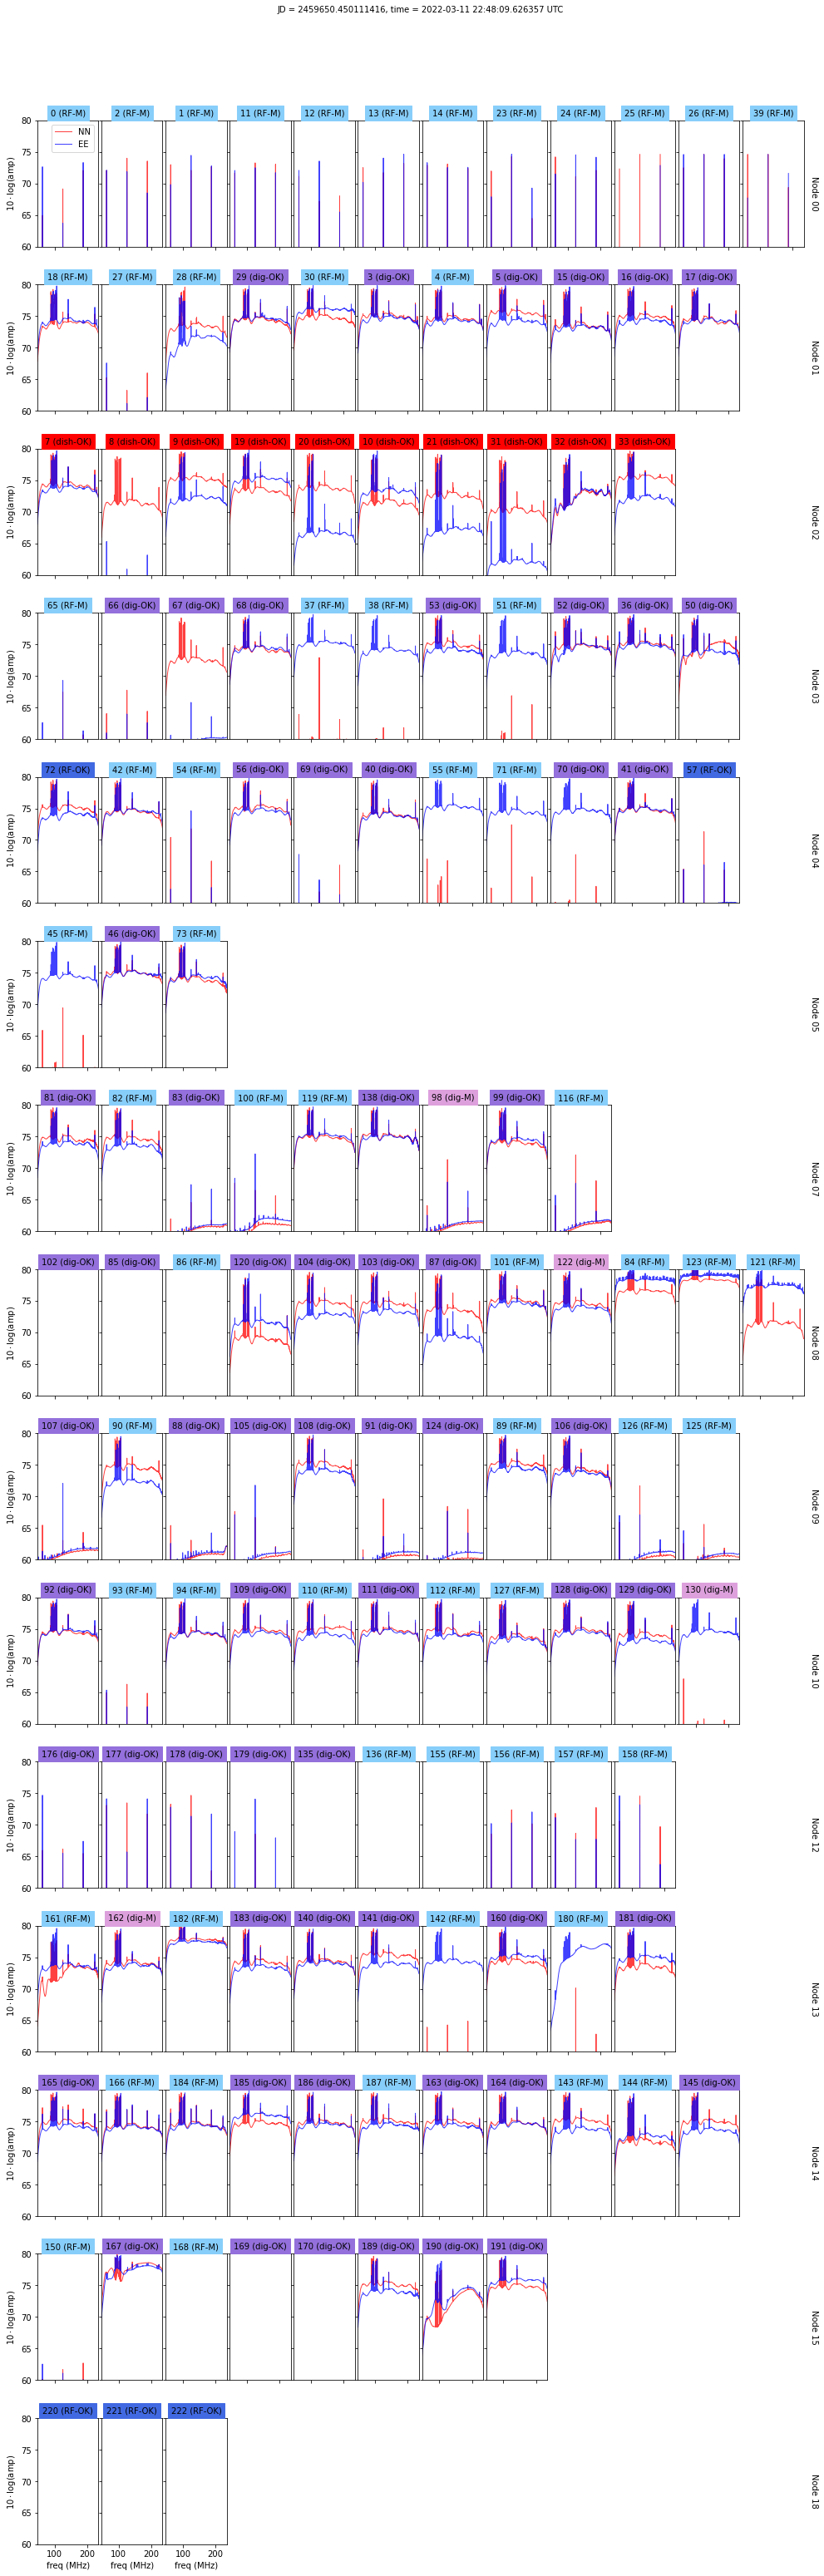

In [14]:
plots.plot_autos(uv_sum_autos,dtype='sky')

# Auto-Correlation Waterfalls

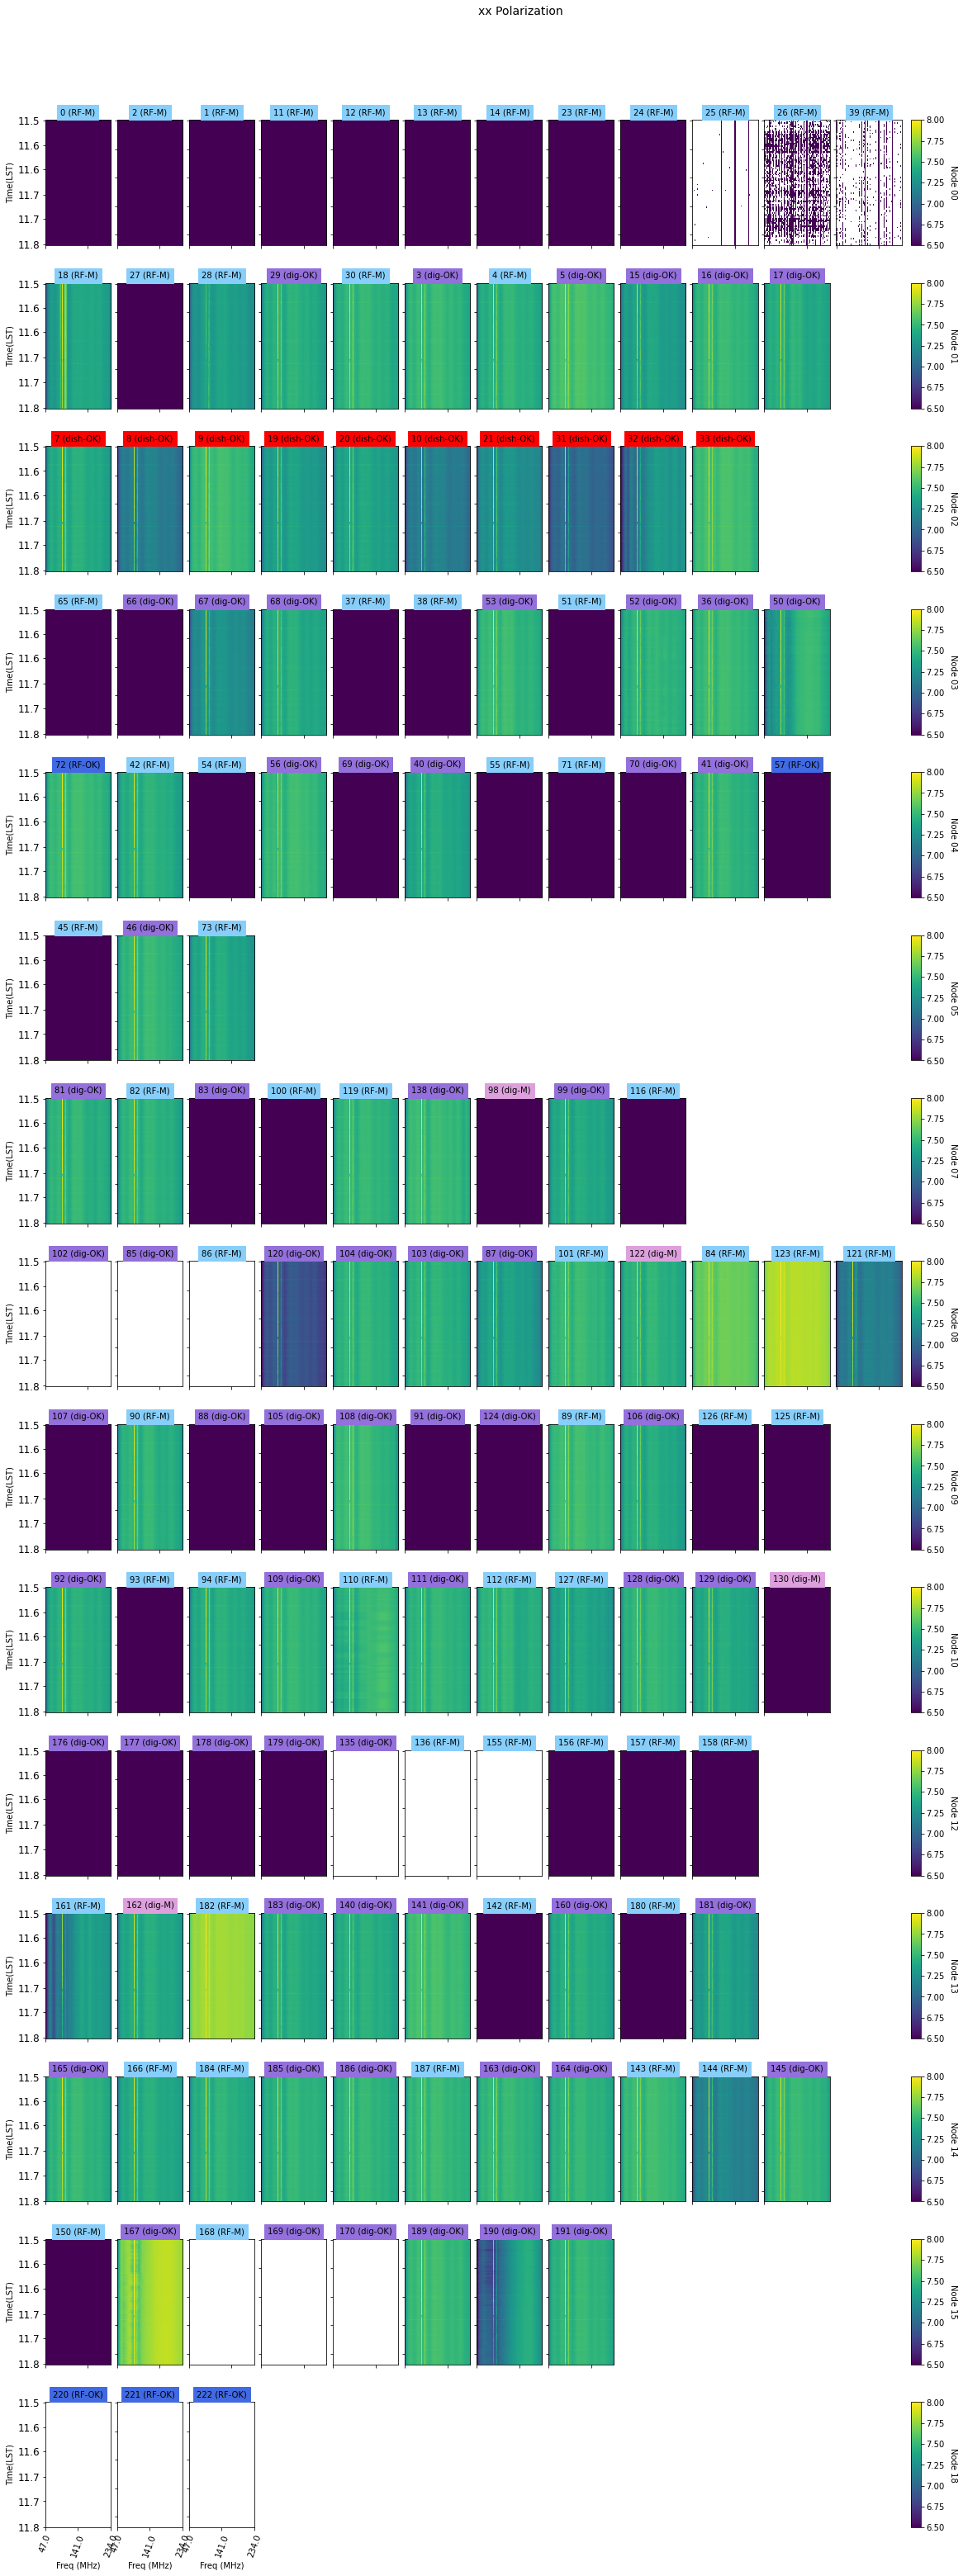

In [15]:
plots.plot_wfs(uv_sum_autos,pol='xx',dtype="sky",plotType='raw')

# Auto-Correlation Mean-Subtracted Waterfalls

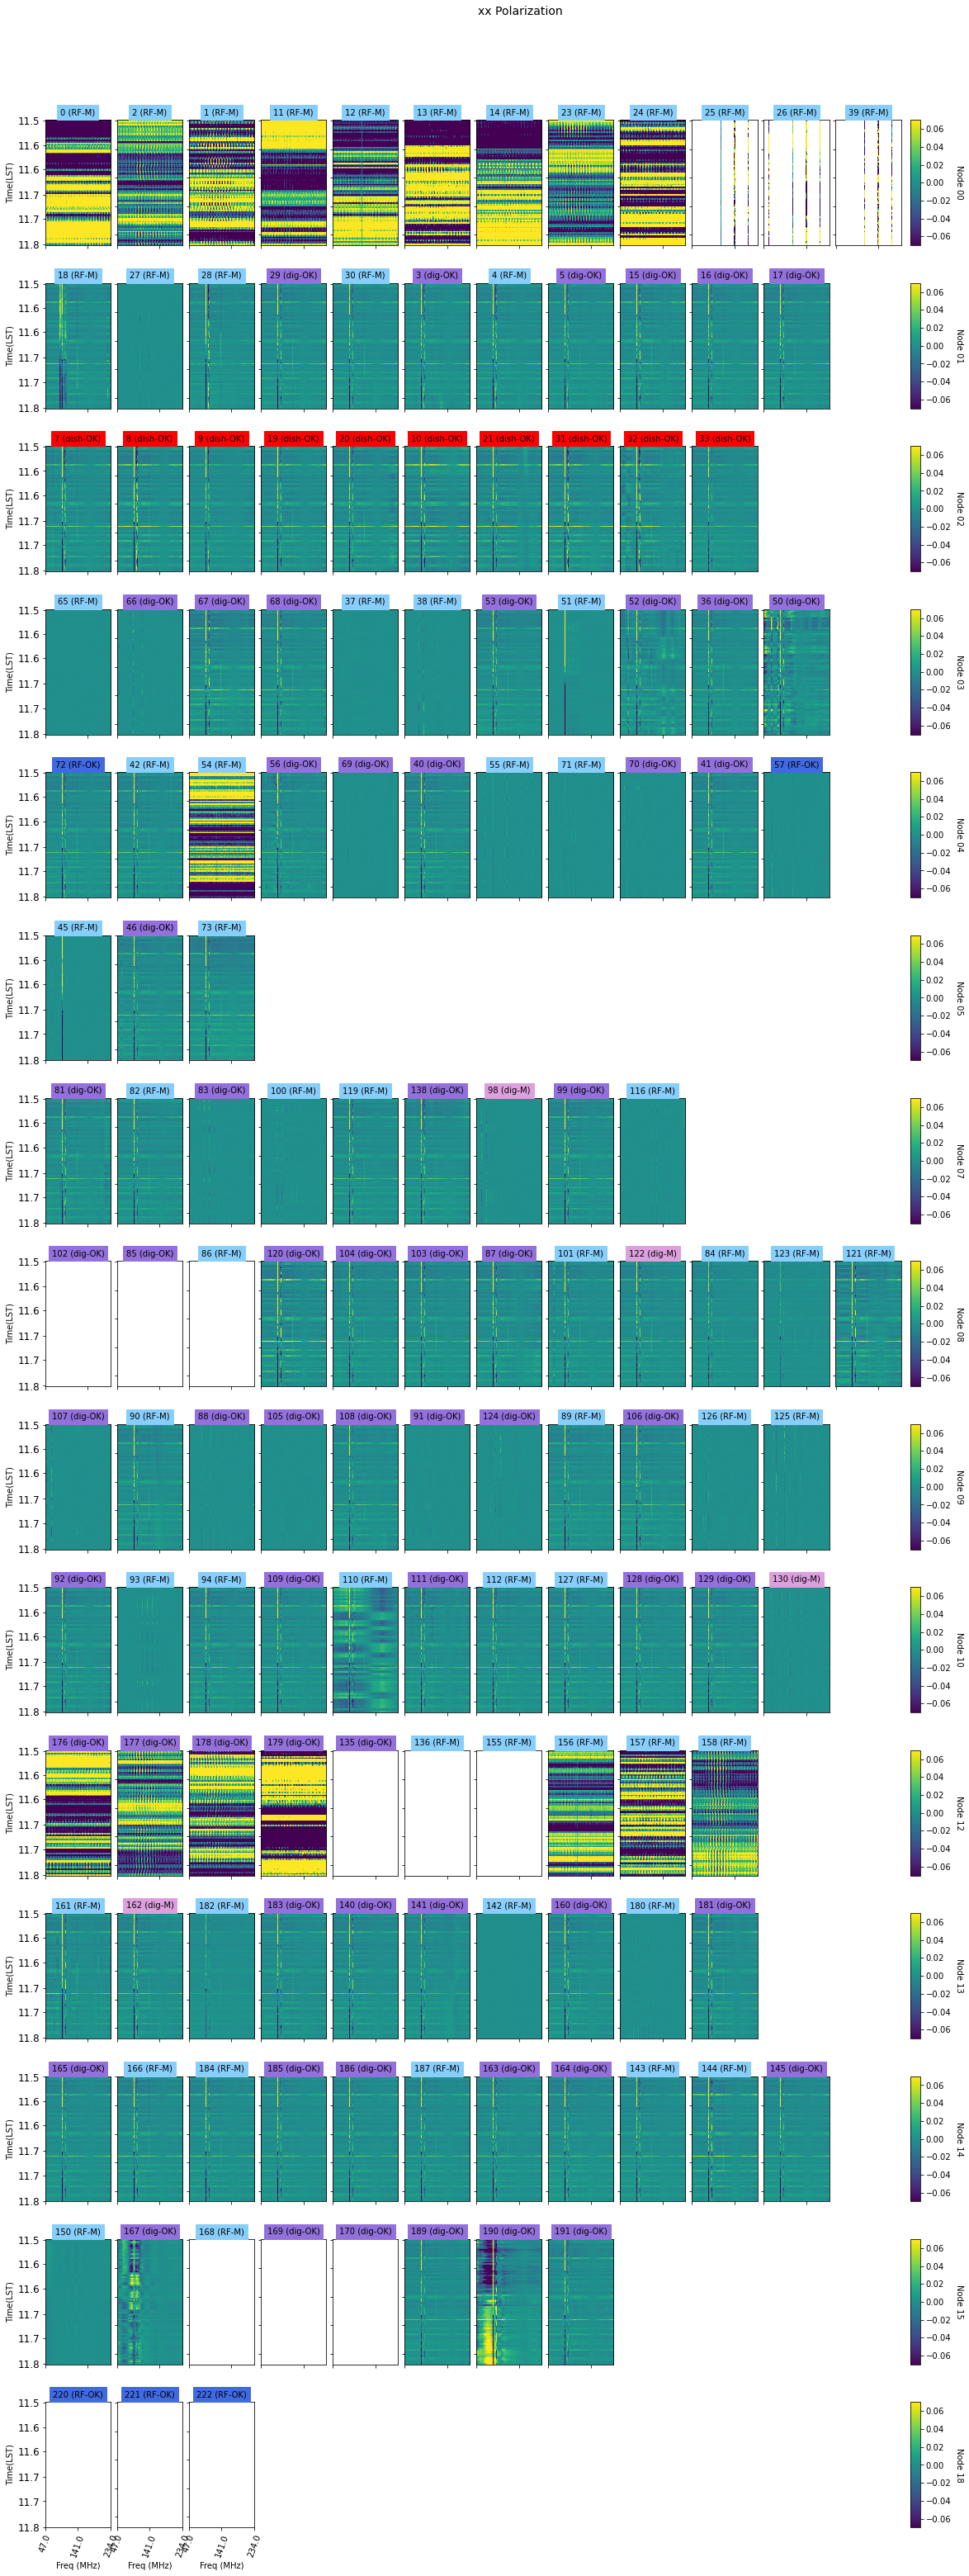

In [16]:
plots.plot_wfs(uv_sum_autos,pol='xx',dtype="sky",plotType='mean_sub')

# Single Antenna Auto-Correlation Inspection Plot

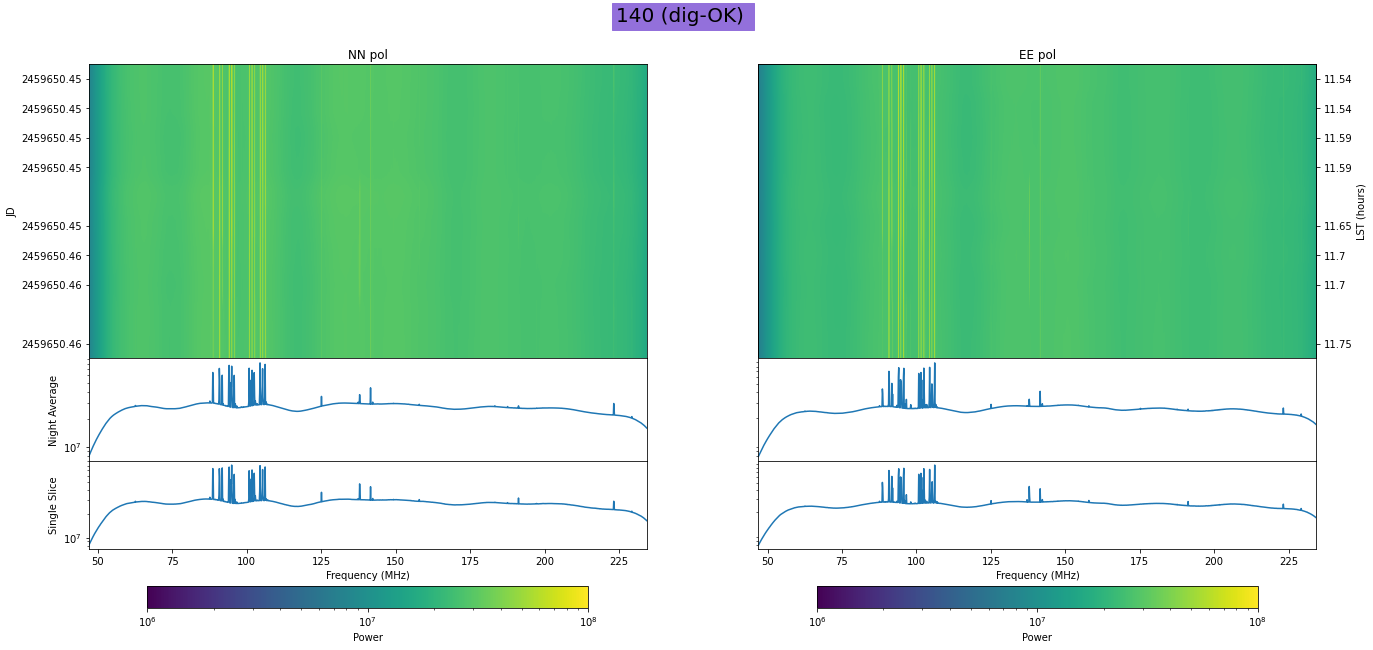

In [19]:
plots.waterfall_lineplot(uv_sum,140)

# Single Baseline Cross-Correlation Inspection Plot

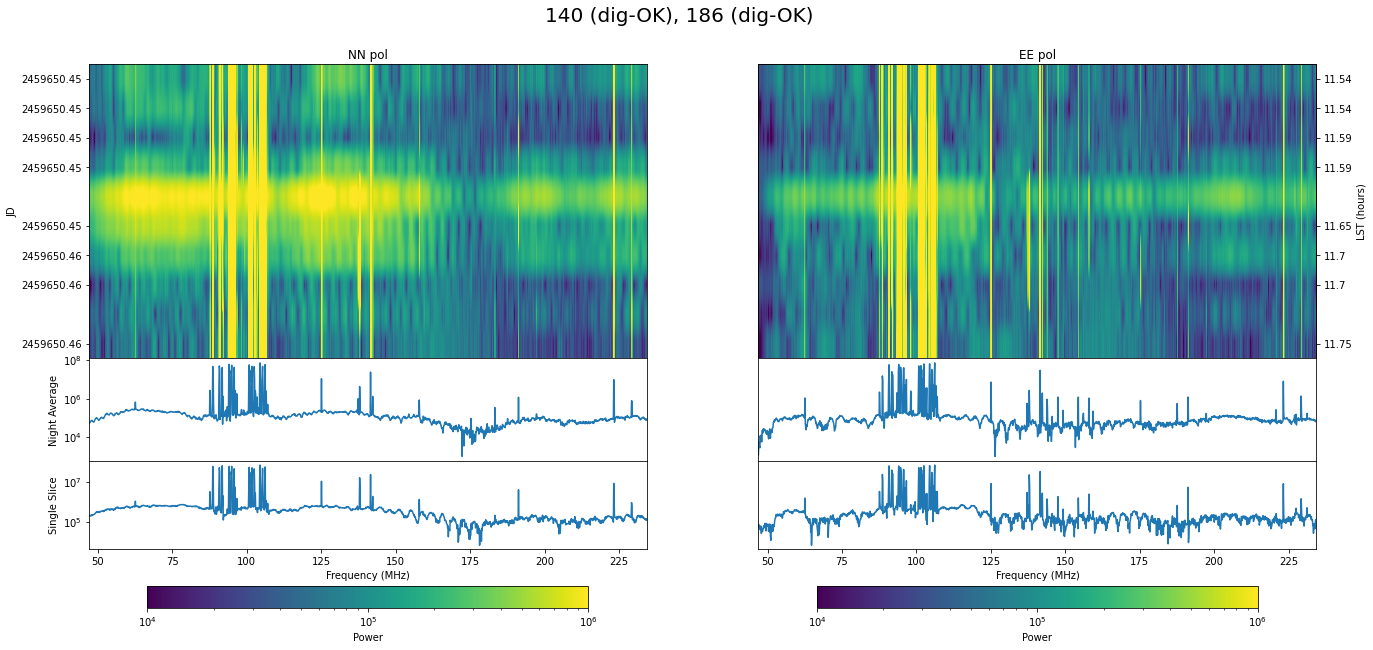

In [20]:
plots.waterfall_lineplot(uv_sum,(140,186),vmin=1e4,vmax=1e6)